Multi-layer Perceptron Regressor (MLPRegressor) - Exercício - Temperatura Mínima Diária da Cidade de Melbourn Austrália - TDNN (rede neural com retardo de tempo)

In [ ]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("variacaoValores.csv") # Carregamento do dataset via Pandas
print(df.iloc[:, 1])



0      0.1701
1      0.1023
2      0.4405
3      0.3609
4      0.7192
        ...  
115    0.4499
116    0.2564
117    0.7642
118    0.1411
119    0.3626
Name: f(t), Length: 120, dtype: float64


#Cenário 1

In [ ]:
dfNew = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-5): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-5': [dados[i]], 'x-4': [dados[i+1]], 'x-3': [dados[i+2]], 'x-2': [dados[i+3]],
                             'x-1': [dados[i+4]], 'x': [dados[i+5]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y = dfNew[['x']] # Inclusão da variável x no vetor de saídas desejadas
x = dfNew.drop('x', axis=1) # Exclusão da variável x das entradas

Pré-Processamento dos Dados

In [ ]:
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30, random_state=None) # Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste


##Exercício 1

Aplicação do MLPRegressor

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='sgd',
                       max_iter=5000, tol=0.000001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001, learning_rate = 'constant')

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, solver='sgd', tol=1e-06)

Avaliação do Modelo

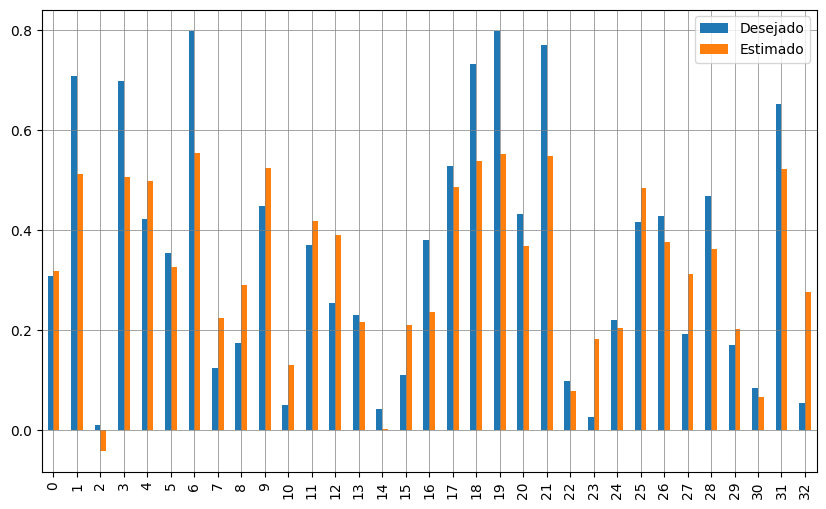

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY.values.ravel(), 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

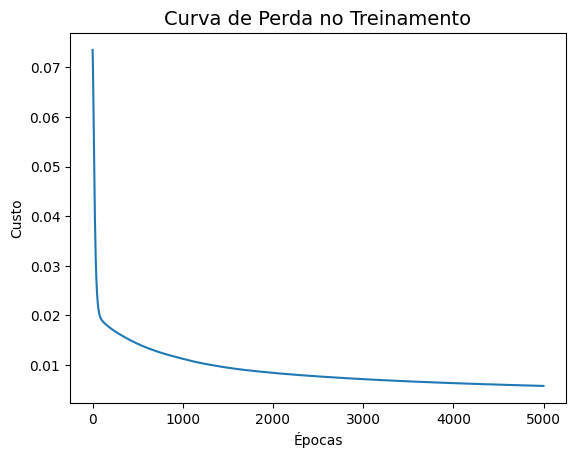

In [ ]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  5000
Loss:  0.005799561251324288
Mean Absolute Error (MAE):  0.10182777798836469
Mean Squared Error (MSE):  0.015530630490234499
Root Mean Squared Error (RMSE):  0.12462195027455837
R2 Score:  0.7452359730952347


##Exercício 2

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam',
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

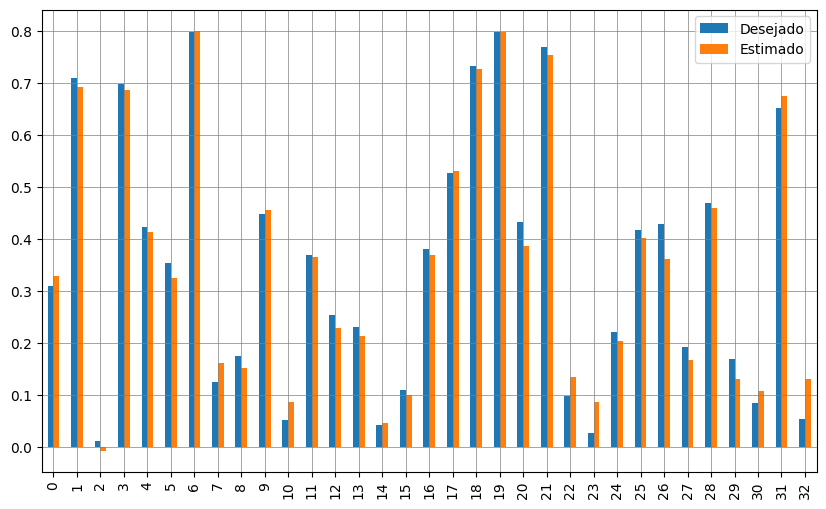

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY.values.ravel(), 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

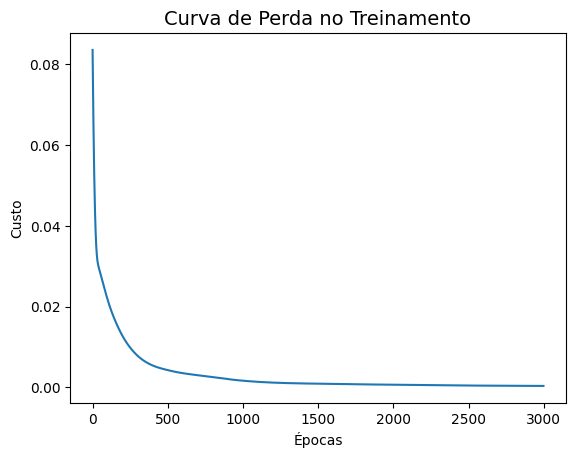

In [ ]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  2998
Loss:  0.00033867789758536694
Mean Absolute Error (MAE):  0.02282397275559995
Mean Squared Error (MSE):  0.0008572561746873979
Root Mean Squared Error (RMSE):  0.029278937389997574
R2 Score:  0.9859375937577253


#Cenário 2

In [ ]:
dfNew = pd.DataFrame(columns = ['x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-10): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-10': [dados[i]], 'x-9': [dados[i+1]], 'x-8': [dados[i+2]], 'x-7': [dados[i+3]],
                             'x-6': [dados[i+4]], 'x-5': [dados[i+5]], 'x-4': [dados[i+6]], 'x-3': [dados[i+7]],
                             'x-2': [dados[i+8]], 'x-1': [dados[i+9]], 'x': [dados[i+10]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y = dfNew[['x']] # Inclusão da variável x no vetor de saídas desejadas
x = dfNew.drop('x', axis=1) # Exclusão da variável x das entradas

Pré-Processamento dos Dados

In [ ]:
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30, random_state=None) # Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste


##Exercício 1

Aplicação do MLPRegressor

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(25), activation='relu', solver='sgd',
                       max_iter=5000, tol=0.000001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001, learning_rate = 'constant')

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=25,
             max_iter=5000, solver='sgd', tol=1e-06)

Avaliação do Modelo

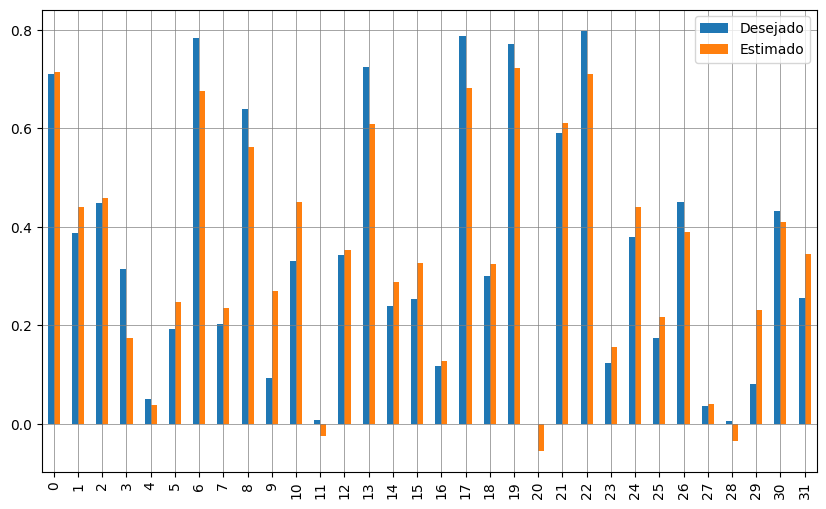

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY.values.ravel(), 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

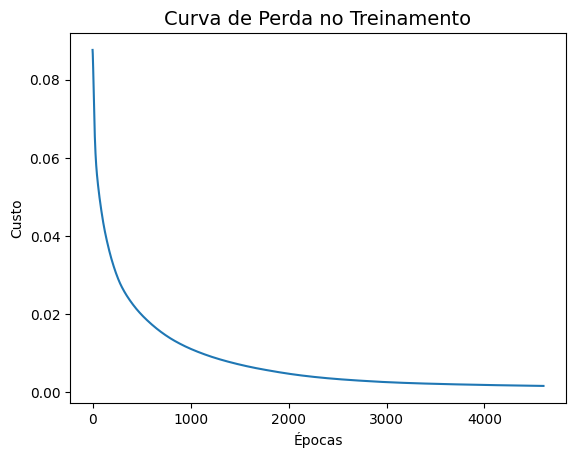

In [ ]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  4603
Loss:  0.0016339686276008972
Mean Absolute Error (MAE):  0.05994129979298789
Mean Squared Error (MSE):  0.005604600279727281
Root Mean Squared Error (RMSE):  0.07486387833746846
R2 Score:  0.9143206934541223


##Exercício 2

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(25), activation='relu', solver='adam',
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=25,
             max_iter=5000, tol=1e-06)

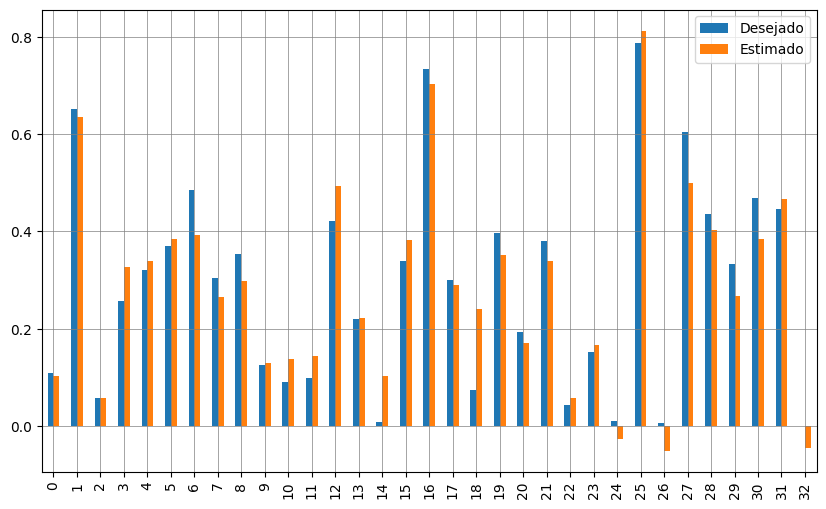

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY.values.ravel(), 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

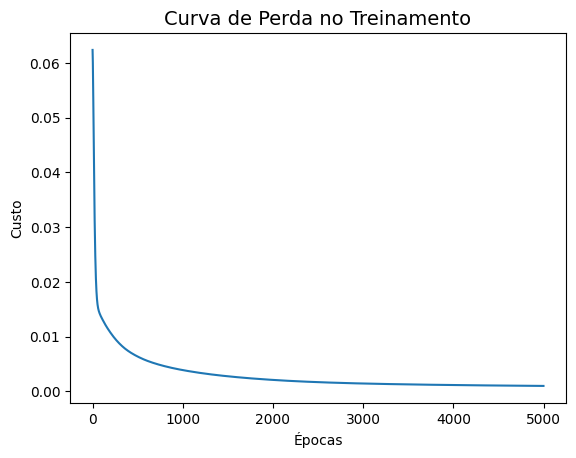

In [ ]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  5000
Loss:  0.0009692432225726182
Mean Absolute Error (MAE):  0.04376534878361549
Mean Squared Error (MSE):  0.003168046220778354
Root Mean Squared Error (RMSE):  0.05628539971234418
R2 Score:  0.9302238982325162


#Cenário 3

In [ ]:
dfNew = pd.DataFrame(columns = ['x-15', 'x-14', 'x-13', 'x-12', 'x-11','x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-15): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-15': [dados[i]], 'x-14': [dados[i+1]], 'x-13': [dados[i+2]], 'x-12': [dados[i+3]],
                             'x-11': [dados[i+4]], 'x-10': [dados[i+5]], 'x-9': [dados[i+6]], 'x-8': [dados[i+7]],
                             'x-7': [dados[i+8]], 'x-6': [dados[i+9]], 'x-5': [dados[i+10]], 'x-4': [dados[i+11]],
                             'x-3': [dados[i+12]], 'x-2': [dados[i+13]], 'x-1': [dados[i+14]], 'x': [dados[i+15]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y = dfNew[['x']] # Inclusão da variável x no vetor de saídas desejadas
x = dfNew.drop('x', axis=1) # Exclusão da variável x das entradas

Pré-Processamento dos Dados

In [ ]:
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30, random_state=None) # Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste


##Exercício 1

Aplicação do MLPRegressor

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='sgd',
                       max_iter=5000, tol=0.000001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001, learning_rate = 'constant')

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=50,
             max_iter=5000, solver='sgd', tol=1e-06)

Avaliação do Modelo

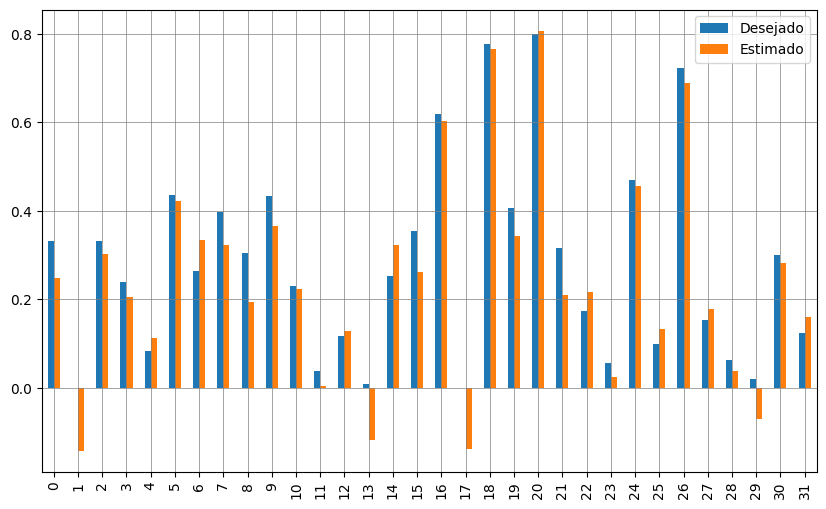

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY.values.ravel(), 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

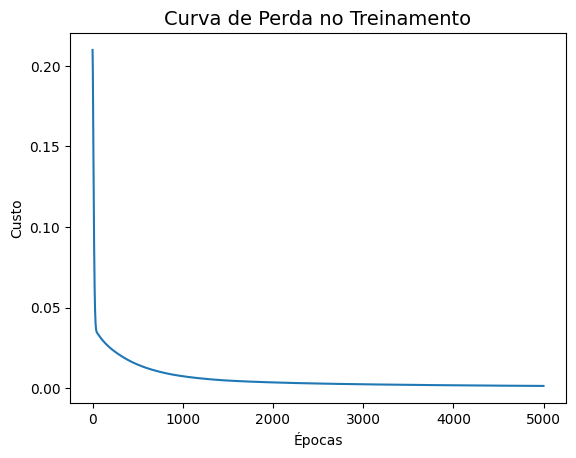

In [ ]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  5000
Loss:  0.0013330257972752617
Mean Absolute Error (MAE):  0.052818319000180296
Mean Squared Error (MSE):  0.004368462926963293
Root Mean Squared Error (RMSE):  0.06609434867644352
R2 Score:  0.9105352832076995


##Exercício 2

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam',
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=50,
             max_iter=5000, tol=1e-06)

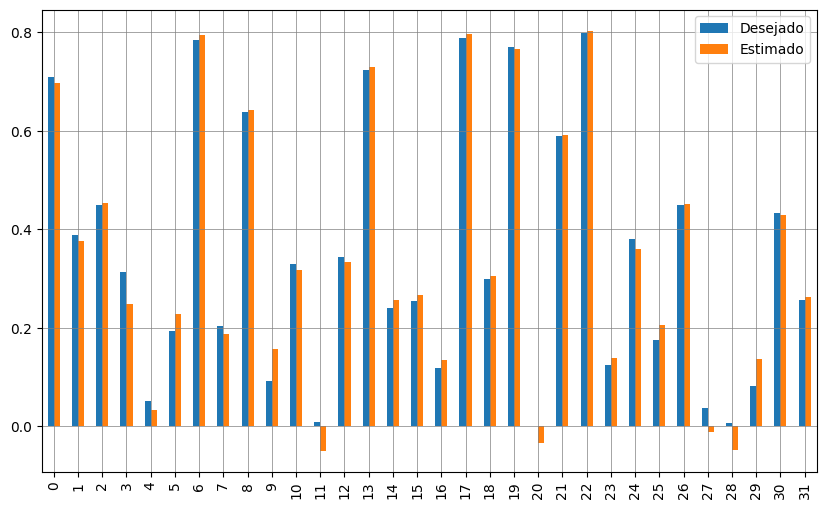

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY.values.ravel(), 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

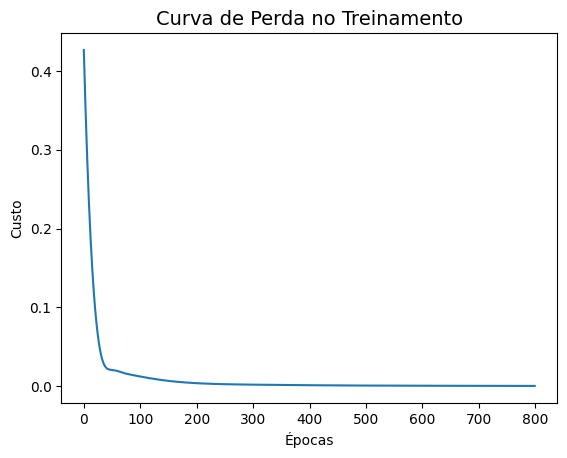

In [ ]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  800
Loss:  0.00033670017096269333
Mean Absolute Error (MAE):  0.020855780696298273
Mean Squared Error (MSE):  0.0008172979655861151
Root Mean Squared Error (RMSE):  0.02858842362891167
R2 Score:  0.987505706127506
